Market Basket Analysis using Associate Rule Mining

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

In [2]:
gro=pd.read_csv("Groceries_dataset.csv") #frameing the data  
gro.head() #view

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
gro.info()#Getting to now the dataset(columns it contain)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
gro.isnull().sum().sort_values(ascending=False)#checking if data has any null values and sorting the null values in accending order.

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
gro["Date"]=pd.to_datetime(gro["Date"])#date objects into readable strings. 
gro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\Sujit\AppData\Local\Temp\ipykernel_18344\1311361650.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gro["Date"]=pd.to_datetime(gro["Date"])#date objects into readable strings.


In [6]:
gro.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


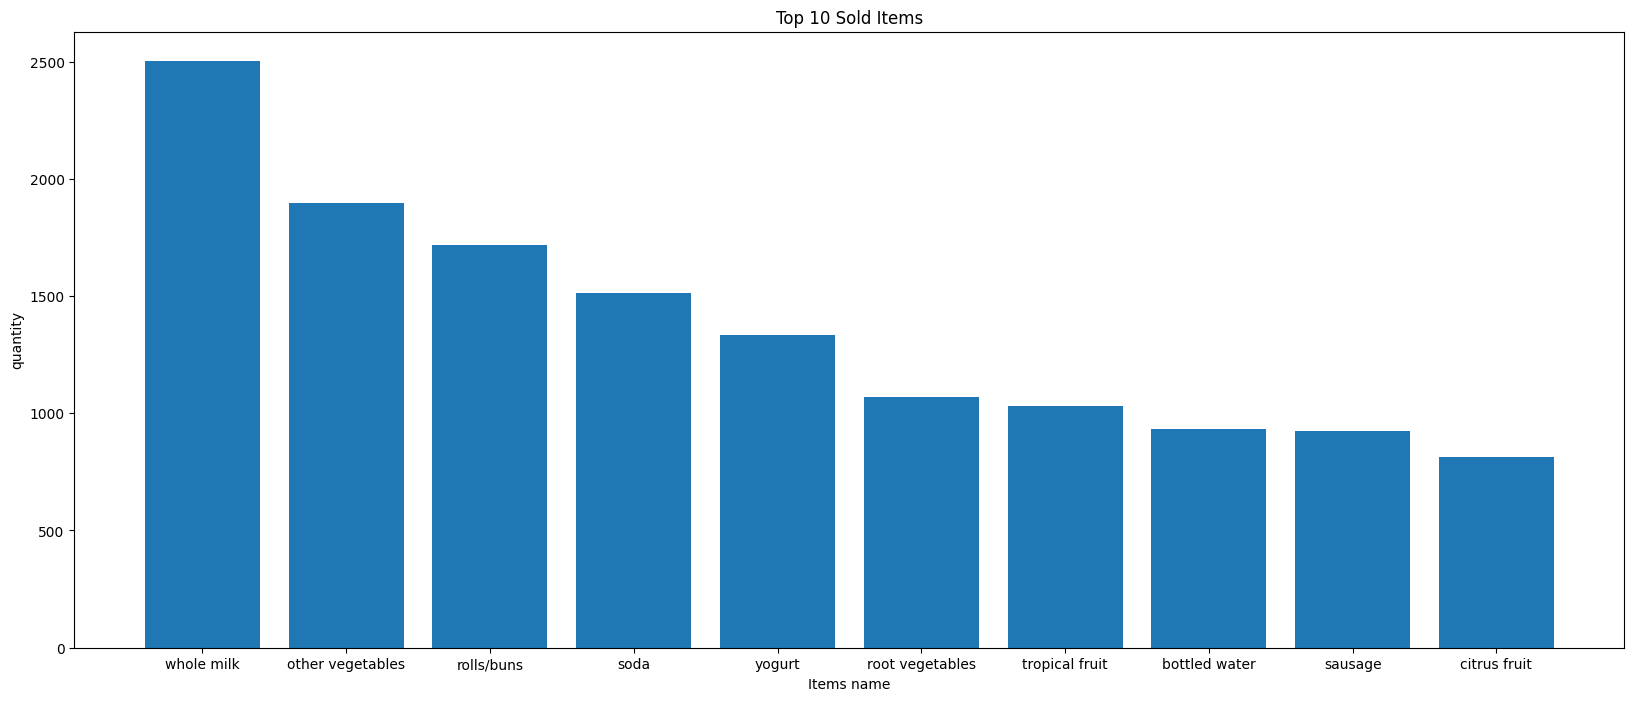

In [7]:
Items_distr= gro.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)
Bars=Items_distr["itemDescription"]
height=Items_distr["Frequency"]
x_pos=np.arange(len(Bars))
plt.figure(figsize=(20,8))
plt.bar(x_pos,height)
plt.title("Top 10 Sold Items")
plt.xlabel("Items name")
plt.ylabel("quantity")
plt.xticks(x_pos,Bars)#location 
plt.show() 


In [8]:
gro_date=gro.set_index(['Date'])# sets the index to date column.
gro_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of items sold')]

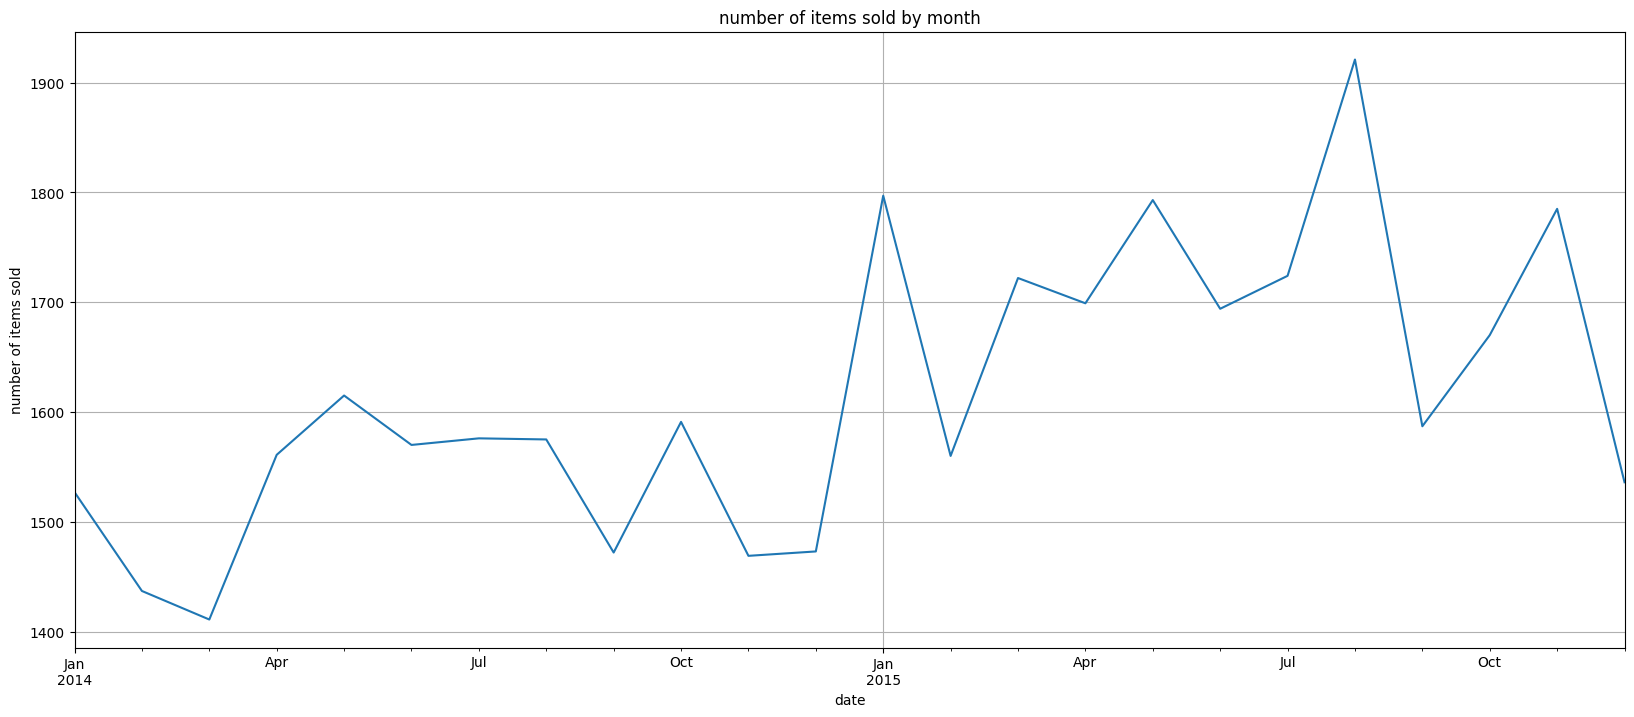

In [9]:
gro_date.resample('M')['itemDescription'].count().plot(figsize=(20,8),grid=True,title='number of items sold by month').set(xlabel='date',ylabel='number of items sold')


In [10]:
cust_level=gro[['Member_number','itemDescription']].sort_values(by="Member_number",ascending=False)
cust_level['itemDescription']=cust_level['itemDescription'].str.strip()#removes the whitespace from orginal str..
cust_level 

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [11]:
#combining all the items of each customer in list format.
transactions=[a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number'])) ]
transactions 

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve

In [12]:
from apyori import apriori
rules= apriori ( transactions=transactions,min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2)

In [13]:
results=list(rules)#storing the result in list format.


In [14]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [15]:
# obtaining the model in readable formate
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]
    rhs=[tuple(result[2][0][1])[0] for result in results]
    supports=[result[1] for result in results]
    confidence =[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results ]
    return list(zip(lhs,rhs,supports,confidence,lifts))#zip-continues till the shorlist argument the exausted
resultsindataframe=pd.DataFrame(inspect(results),columns=['left hand side','Right hand side','Support','Confidence','lifts'])   

In [16]:
resultsindataframe.nlargest(n=10,columns='lifts')

,left hand side,Right hand side,Support,Confidence,lifts
4915,berries,other vegetables,0.002052,0.105263,14.654135
4914,berries,other vegetables,0.002052,0.105263,12.068111
2674,beef,other vegetables,0.002052,0.242424,11.524021
3573,brown bread,soda,0.002052,0.073394,11.443670
4133,long life bakery product,meat,0.002052,0.148148,11.105413
3290,bottled water,sausage,0.002052,0.150943,10.322410
2904,brown bread,other vegetables,0.002309,0.097826,9.533152
5045,meat,pastry,0.002052,0.135593,9.438257
2902,brown bread,pastry,0.002052,0.086957,9.415459
2734,berries,brown bread,0.002309,0.118421,9.232105
